In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model, preprocessing, model_selection, linear_model, metrics
import joblib
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!="O"]
numerical_feature

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

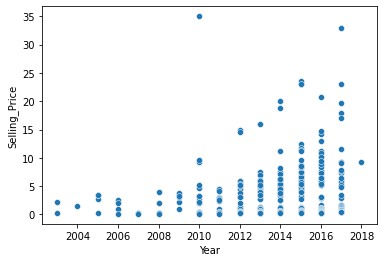

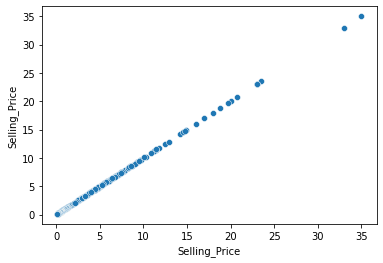

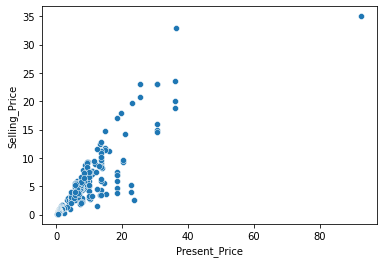

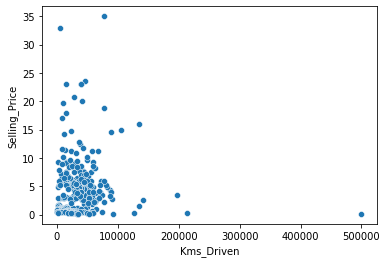

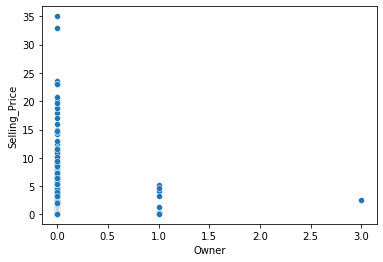

In [ ]:
for feature in numerical_feature:
   sns.scatterplot(x = df[feature], y = df['Selling_Price'])
   plt.show()

In [ ]:
df = df.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], axis=1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
dataset=pd.DataFrame(scaler.transform(df),columns=df.columns)
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,0.733333,0.093123,0.057109,0.053053,0.0
1,0.666667,0.133238,0.099913,0.085085,0.0
2,0.933333,0.204871,0.103273,0.012813,0.0
3,0.533333,0.078797,0.041504,0.009409,0.0
4,0.733333,0.128940,0.070980,0.083984,0.0


In [ ]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, random_state=42)
X_test

,Year,Present_Price,Kms_Driven,Owner
177,2016,0.570,24000,0
289,2016,13.600,10980,0
228,2012,9.400,60000,0
198,2011,0.570,35000,1
60,2013,18.610,40001,0
9,2015,8.920,42367,0
118,2015,1.470,26000,0
154,2014,0.880,8000,0
164,2016,0.540,14000,0
33,2014,9.950,45000,0


In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predLR = lr.predict(X_test)
metrics.r2_score(y_test, y_predLR)

0.8400582186152037

In [ ]:
joblib.dump(lr, '/content/drive/My Drive/car_price_lr.pkl')

['/content/drive/My Drive/car_price_lr.pkl']